# Declaration of Originality

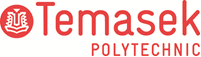

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


1. Business Understanding
Goal: Predict the exam score based on certain characteristics of students & exam difficulty(Regression)

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
## Read *.csv file into pandas DataFrame
FILE_PATH = 'Exam_Score_Prediction.csv'
df=pd.read_csv(FILE_PATH)
df



,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [4]:
df=df.drop(['student_id'], axis=1)
df


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [5]:
features = df.drop(['age', 'gender', 'course'], axis=1)
features


,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...
19995,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


I have determined that these factors affect exam_score.

-study_hours is important as the number of hours spent studying affects how much content a student can study properly. This affects the exam score as having more study hours gives students the time to understand more concepts better and test themselves as compared to a students with a lower study hours.

-class_attendance is an important factor as class_attendance  reflects on how much time a student has spent in class. A student with a lower class_attendance may score lower than a student with higher class_attendance as they were not present in as many classes and may have missed out on what is being taught in class and clarifications with regards to the content.

-internet_access is an important factor as internet_access grants students access to online resources such as Youtube, or any online material that they may have. Internet access also lets them communicate with peers to clairify anything when outside of school hours. 

-sleep_hours and sleep_quality is one of the most crucial factors that affects exam score. In order for the brain to absorb and retain information, it is important to have sufficient amounts of quality rest. I decided to not combine these factors into 1 as it is possible to merge them into one factor called 'sleep_score'. This is because they capture different information. A student could have 8 hours of poor sleep and another student could have 5 hours of good quality rest. Keeping them separate allows to learn how the 2 factors contribute separately to the exam_score without imposing assumptions, such as assuming that sleep quality and sleep hours has a linear relationship, sleep quality can compensated by more sleep hours, onto the model.


## 2.2 Summary Statistics

In [6]:
## Understand the type of variable for each column
df. info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


Based on the output of df.info(), the dataset contains 20,000 records and 12 variables with no missing values.

- Numerical variables:
  - age (int64): Discrete numerical variable representing the age of students.
  - study_hours, class_attendance, sleep_hours, exam_score (float64): Continuous numerical variables representing time, attendance percentage, sleep duration, and exam performance.

- Categorical variables:
  - gender, course, internet_access, sleep_quality, study_method, facility_rating, exam_difficulty (object): Categorical variables representing qualitative attributes or categories.

Overall, the dataset consists of a mix of numerical and categorical features, which is suitable for exploratory data analysis and further preprocessing such as encoding categorical variables for modeling.


In [7]:
## Check for missing data
df.isna().sum()


age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [8]:
## Describe data distribution

df.describe()


,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [9]:
df['study_hours'].value_counts()

study_hours
7.91    225
0.08    210
5.61     42
0.90     41
2.81     41
       ... 
1.93     14
0.37     13
1.14     13
1.84     12
5.16     11
Name: count, Length: 784, dtype: int64

In [10]:
df['exam_score'].value_counts()

exam_score
100.000    493
19.599     200
69.400      54
61.300      54
57.600      52
          ... 
20.500       2
22.800       2
22.400       2
20.100       2
21.900       1
Name: count, Length: 805, dtype: int64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [11]:
## Understanding distribution of target
col_y= 'exam_score'


### 2.3.1.2 Understanding distribution of features

In [12]:
## Understanding distribution of features
df.describe()


,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


### 2.3.2 Understanding relationship between variables

In [13]:
## Understanding relationship between variables


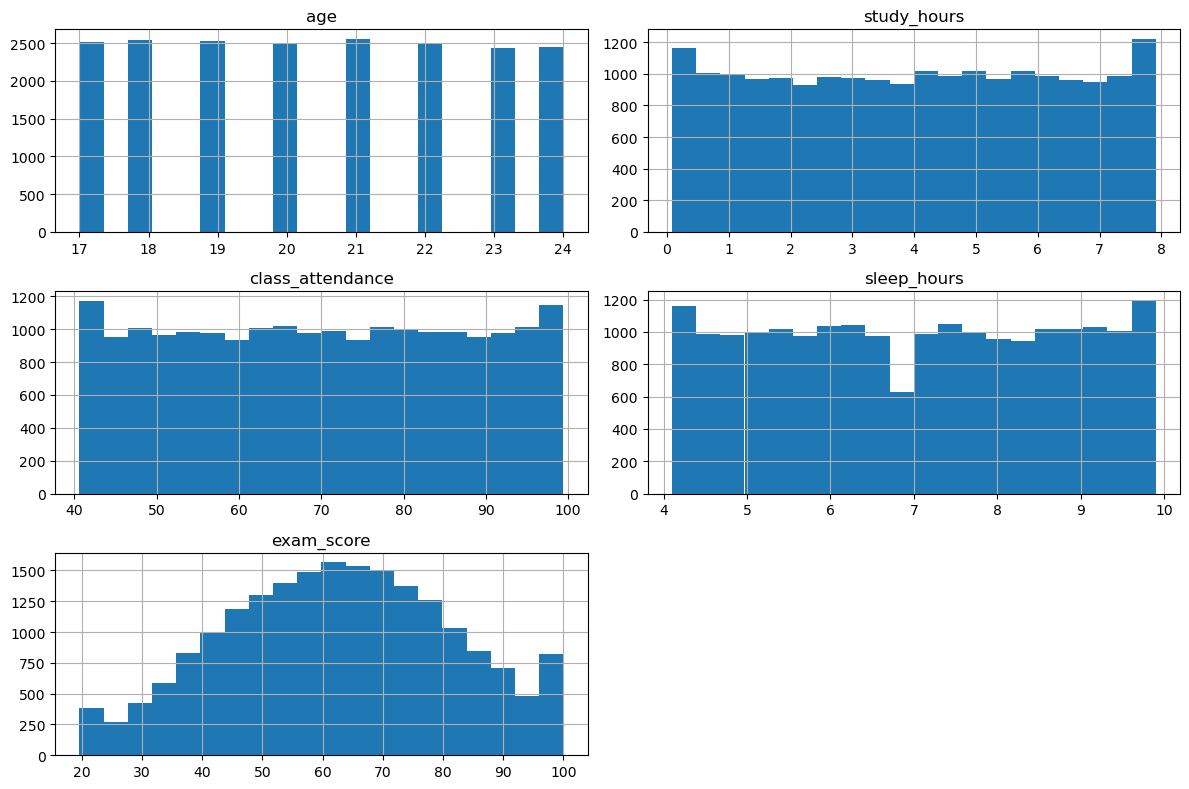

In [14]:
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

internet_access Heatmap


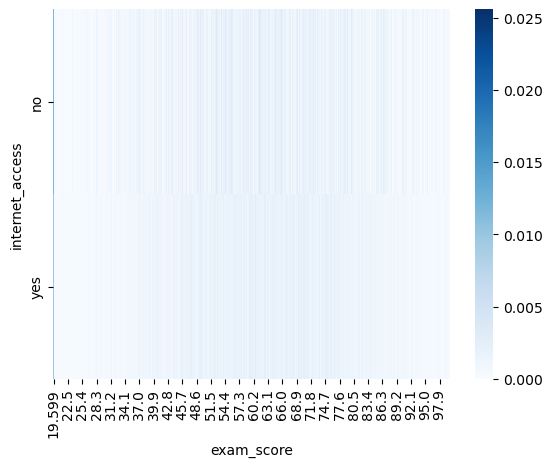

sleep_quality Heatmap


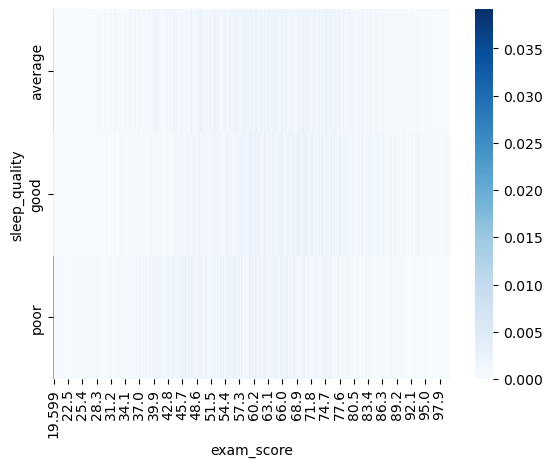

study_method Heatmap


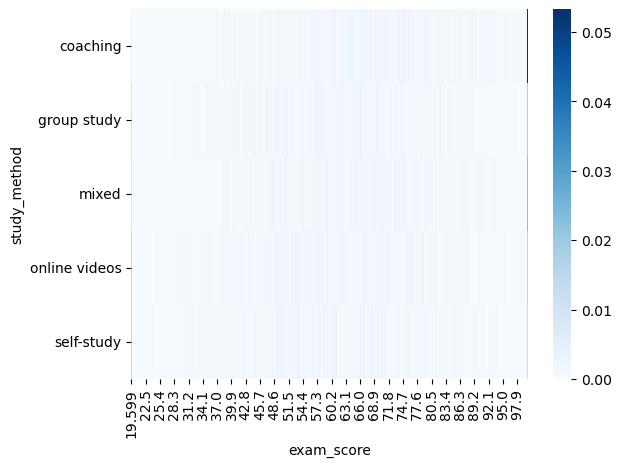

facility_rating Heatmap


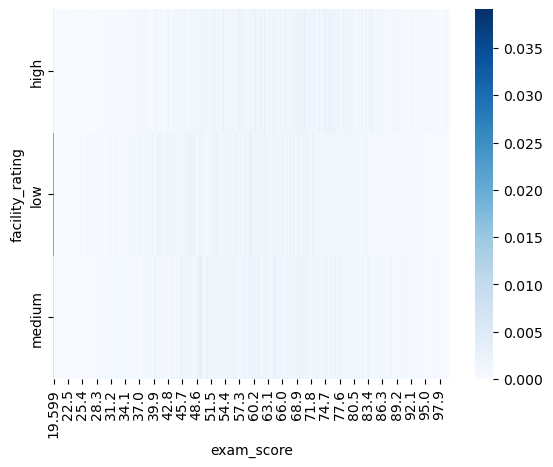

exam_difficulty Heatmap


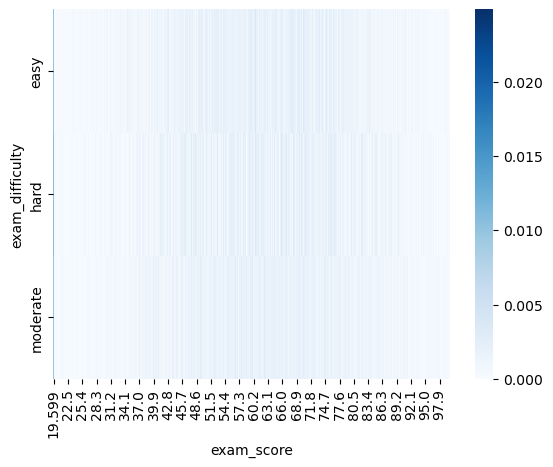

In [15]:
for col in features.select_dtypes(include=['object', 'category']).columns:
    print(f'{col} Heatmap')
    sns.heatmap(pd.crosstab(df[col], df['exam_score'], normalize='index'), cmap='Blues')
    plt.show()

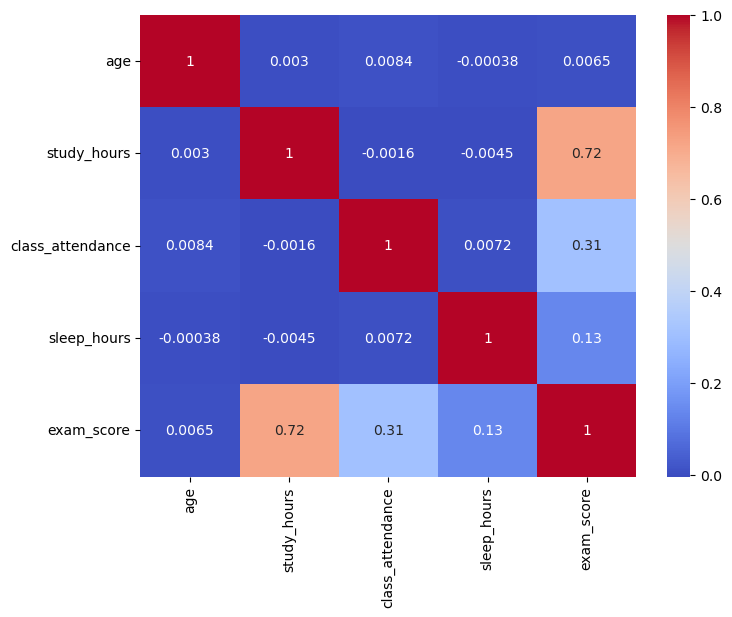

In [16]:
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

corr = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

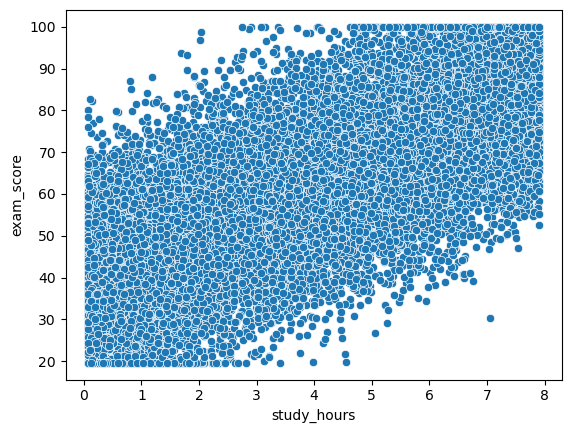

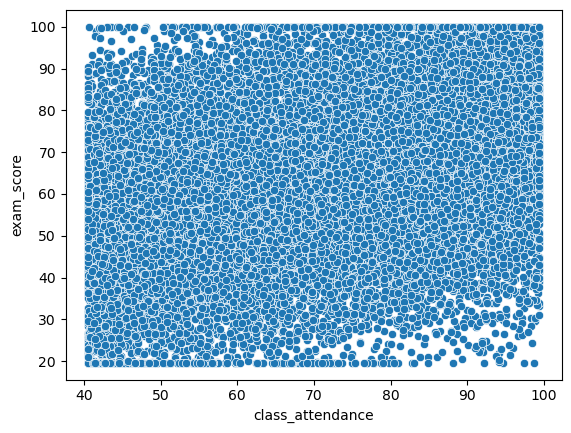

In [17]:
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.show()

sns.scatterplot(x='class_attendance', y='exam_score', data=df)
plt.show()

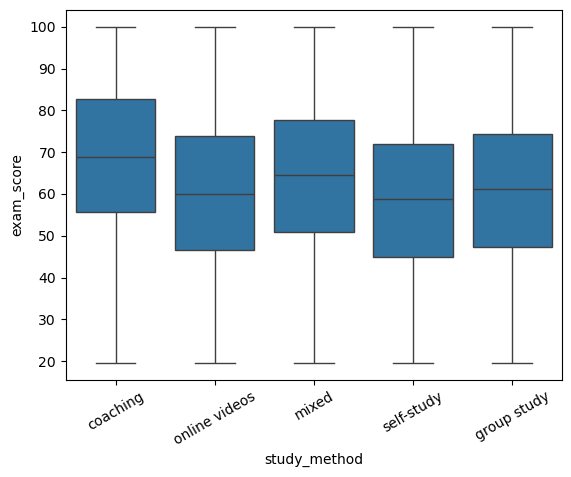

In [18]:
sns.boxplot(x='study_method', y='exam_score', data=df)
plt.xticks(rotation=30)
plt.show()


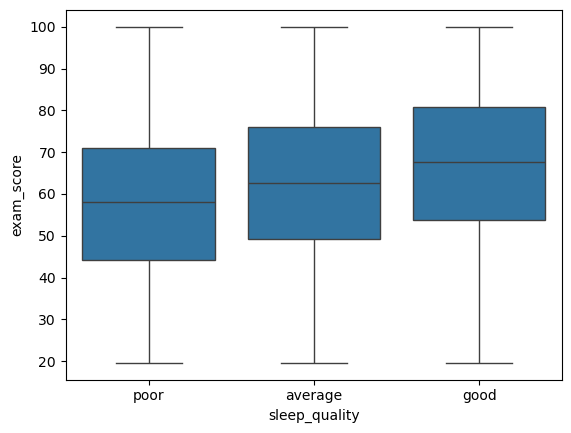

In [19]:
sns.boxplot(x='sleep_quality', y='exam_score', data=df)
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [20]:
## Clean data
df.dtypes

age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object

In [26]:
df['internet_access'] = df['internet_access'].str.lower()
df['sleep_quality'] = df['sleep_quality'].str.lower()
df['facility_rating'] = df['facility_rating'].str.lower()
df['exam_difficulty'] = df['exam_difficulty'].str.lower()
#standardising text such as 'Yes' to 'yes'

In [ ]:
df['internet_access'] = df['internet_access'].map({'yes': 1, 'no': 0})

sleep_quality = {'poor': 1, 'average': 2, 'good': 3}
facility = {'low': 1, 'medium': 2, 'high': 3}
exam_difficulty = {'easy': 1, 'moderate': 2, 'hard': 3}

df['sleep_quality'] = df['sleep_quality'].map(sleep_quality)
df['facility_rating'] = df['facility_rating'].map(facility)
df['exam_difficulty'] = df['exam_difficulty'].map(exam_difficulty)



In [27]:
y=df[col_y]

col_irrelevant = [col_y, 'age', 'gender']

X = df.drop(col_irrelevant, axis=1)

X=pd.get_dummies(X
                 , drop_first=True
                 )
X

,study_hours,class_attendance,sleep_hours,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,2.78,92.9,7.4,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,True,False
1,3.37,64.8,4.6,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True
2,7.88,76.8,8.5,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,0.67,48.4,5.8,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True
4,0.89,71.6,9.8,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.50,71.3,5.0,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False
19996,3.71,41.6,5.9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
19997,7.88,68.2,4.6,False,False,False,False,False,True,True,False,True,True,False,False,False,True,False,False,False
19998,4.60,76.3,6.1,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True


## 3.2 Train-Test Split

In [29]:

## Split data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2025
                                                    )

# 4. Modelling

### 4.2 Train Model

In [30]:
## Initialise and train model
from sklearn.linear_model import LinearRegression
linr=LinearRegression(fit_intercept=True)
linr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 5. Model Evaluation

In [23]:
## Evaluate model


In [24]:
## New data

## Predict


## Iterative model development


In [25]:
## Further feature engineering / feature selection